In [12]:
#Reading the CSV Files
import pandas as pd
df = pd.read_csv('Data2.csv')
df.columns = ['Target','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A8','A19','A20','A21','A24','A23','A22']
print(df.shape)
df.dropna()
print(df.shape)

print(df.isnull().sum())


import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['A21']))}
df['A21'] = df['A21'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['A24']))}
df['A24'] = df['A24'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['A23']))}
df['A23'] = df['A23'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['A22']))}
df['A22'] = df['A22'].map(class_mapping)

#Deviding the DataSet into Training and Test Sets
from sklearn.cross_validation import train_test_split
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

import numpy as np
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

#Standardization of Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)





print(df.head())

(1000, 25)
(1000, 25)
Target    0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A8        0
A19       0
A20       0
A21       0
A24       0
A23       0
A22       0
dtype: int64
   Target  A1    A2  A3  A4  A5  A6  A7  A8  A9 ...   A15  A16  A17  A8  A19  \
0       1  18  1049  21   1   1   1   4   2   1 ...     4    3    1   3    1   
1       1   9  2799  36   2   2   1   4   0   1 ...     2    3    1   3    1   
2       1  12   841  23   1   1   2   2   9   2 ...     4    3    1   2    1   
3       1  12  2122  39   2   2   1   4   0   1 ...     2    3    1   2    1   
4       1  12  2171  38   2   1   1   4   0   1 ...     4    1    2   2    1   

   A20  A21  A24  A23  A22  
0    1    0    2    0    1  
1    1    2    3    2    3  
2    1    2    3    2    1  
3    2    2    2    3    2  
4    2    1    3    3    3  

[5 rows x

/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0,2):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 0: [ 0.3322  0.1958 -0.1779 -0.1214 -0.0213 -0.5168 -0.3281 -0.006  -0.2572
 -0.2272  0.1734 -0.1394 -0.0366  0.2158  0.0189 -0.1594 -0.0316  0.036
 -0.074  -0.1326 -0.0285  0.0214 -0.0758 -0.0234]

MV 1: [ 0.3322  0.1958 -0.1779 -0.1214 -0.0213 -0.5168 -0.3281 -0.006  -0.2572
 -0.2272  0.1734 -0.1394 -0.0366  0.2158  0.0189 -0.1594 -0.0316  0.036
 -0.074  -0.1326 -0.0285  0.0214 -0.0758 -0.0234]



In [14]:
d = 24 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.zeros((d, d)) # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1) # make column vectors
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter                             # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 24x24


In [15]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[0:])

Class label distribution: [200 500]


In [16]:
d = 24 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 24x24


In [48]:
mean_overall = np.mean(X_train_std, axis=0)
d = 24 # number of features
S_B = np.zeros((d, d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))
print(S_B)

Between-class scatter matrix: 24x24
[[  5.5171e+01   3.2518e+01  -2.9551e+01  -2.0170e+01  -3.5343e+00
   -8.5833e+01  -5.4493e+01  -9.9303e-01  -4.2712e+01  -3.7728e+01
    2.8803e+01  -2.3158e+01  -6.0787e+00   3.5834e+01   3.1335e+00
   -2.6479e+01  -5.2553e+00   5.9782e+00  -1.2295e+01  -2.2027e+01
   -4.7398e+00   3.5532e+00  -1.2587e+01  -3.8799e+00]
 [  3.2518e+01   1.9167e+01  -1.7417e+01  -1.1888e+01  -2.0831e+00
   -5.0590e+01  -3.2118e+01  -5.8530e-01  -2.5175e+01  -2.2237e+01
    1.6977e+01  -1.3649e+01  -3.5828e+00   2.1121e+01   1.8469e+00
   -1.5607e+01  -3.0975e+00   3.5236e+00  -7.2469e+00  -1.2983e+01
   -2.7937e+00   2.0943e+00  -7.4189e+00  -2.2868e+00]
 [ -2.9551e+01  -1.7417e+01   1.5828e+01   1.0803e+01   1.8930e+00
    4.5973e+01   2.9187e+01   5.3188e-01   2.2877e+01   2.0208e+01
   -1.5427e+01   1.2404e+01   3.2558e+00  -1.9193e+01  -1.6783e+00
    1.4183e+01   2.8148e+00  -3.2020e+00   6.5855e+00   1.1798e+01
    2.5387e+00  -1.9031e+00   6.7418e+00   2.0781e

In [18]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [19]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print (eigen_vals.shape)

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])
    
print('\n Variance explained:\n')
eigenv_sum = sum(eigen_vals)
for i,j in enumerate(eigen_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigenv_sum).real))    
    

(24,)
Eigenvalues in decreasing order:

190.694751621
2.84217094304e-14
1.33242649862e-14
1.21819968399e-14
1.21819968399e-14
9.26585714195e-15
9.09536566424e-15
8.06470417112e-15
3.36656198876e-15
3.36656198876e-15
2.10238326071e-15
1.75715077365e-15
1.75715077365e-15
1.64993860404e-15
1.64993860404e-15
9.90760260312e-16
6.16004511386e-16
5.05117695974e-16
3.23642666252e-16
3.23642666252e-16
2.11247762795e-16
2.07899650647e-16
2.07899650647e-16
3.47410499307e-17

 Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%
eigenvalue 21: 0.00%
eigenvalue 22: 0.00%
eigenvalue 23: 0.00%
eigenvalue 24: 0.00%


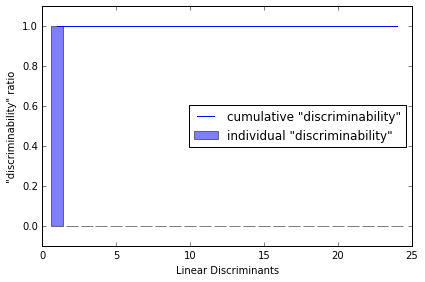

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 25), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 25), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

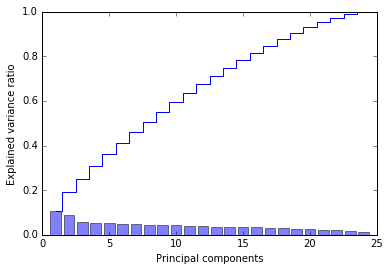

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

plt.bar(range(1, 25), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 25), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [22]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
                      eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.2339 -0.9237]
 [-0.1518  0.0598]
 [ 0.147  -0.058 ]
 [ 0.0309 -0.0122]
 [-0.0862  0.034 ]
 [ 0.6417 -0.2529]
 [ 0.2285 -0.0901]
 [ 0.0885 -0.0349]
 [ 0.2341 -0.0923]
 [ 0.2454 -0.0967]
 [-0.3622  0.1428]
 [ 0.1616 -0.0637]
 [ 0.0612 -0.0241]
 [-0.2036  0.0802]
 [-0.0497  0.0196]
 [ 0.1649 -0.065 ]
 [ 0.0611 -0.0241]
 [ 0.0572 -0.0225]
 [ 0.094  -0.0371]
 [ 0.1519 -0.0599]
 [-0.022   0.0087]
 [-0.01    0.0039]
 [ 0.1179 -0.0465]
 [ 0.1409 -0.0555]]


[[ 1.3834 -0.8021]
 [ 0.3146  0.6118]
 [-0.2437  0.3356]
 ..., 
 [-1.3316  1.2607]
 [ 1.7901 -0.1352]
 [-1.1255  1.1795]]


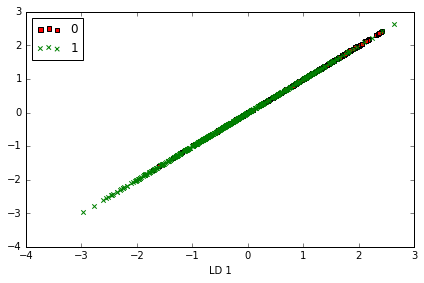

In [51]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0] * (-1), 
                X_train_lda[y_train==l, 0] * (-1), 
                c=c, label=l, marker=m)
print (X_train_lda)
plt.xlabel('LD 1')

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

In [24]:
from sklearn.lda import LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)


/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [52]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


print(X_test)

[[  18 3966   33 ...,    3    2    0]
 [  12  727   33 ...,    3    2    0]
 [  12  983   19 ...,    2    3    3]
 ..., 
 [  48 6999   34 ...,    2    2    3]
 [  12 3331   42 ...,    3    3    0]
 [  11 3905   36 ...,    3    2    3]]


In [53]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001, 
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=1, 
                              criterion='entropy', 
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=10, 
                            p=2, 
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=3, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.78 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.66 (+/- 0.03) [Decision Tree]
ROC AUC: 0.75 (+/- 0.03) [KNN]


/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input 

In [54]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [55]:
# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(
                classifiers=[pipe1, clf2, pipe3])

clf_labels += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input 

ROC AUC: 0.77 (+/- 0.06) [Logistic Regression]
ROC AUC: 0.66 (+/- 0.06) [Decision Tree]
ROC AUC: 0.75 (+/- 0.05) [KNN]
ROC AUC: 0.77 (+/- 0.06) [Majority Voting]


/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input 

/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Jay/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input 

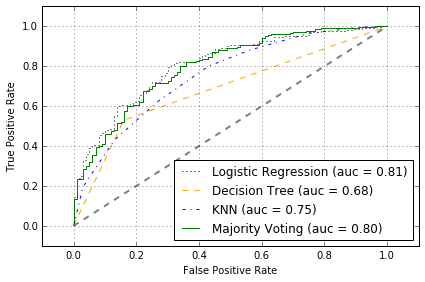

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf, 
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, 
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, 
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, 
             color=clr, 
             linestyle=ls, 
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         color='gray', 
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [57]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


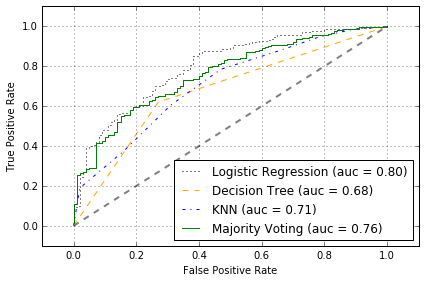

In [58]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf, 
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train_pca, 
                     y_train).predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, 
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, 
             color=clr, 
             linestyle=ls, 
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         color='gray', 
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()